# Import all the modules needed

In [1]:
import numpy as np
from numpy.linalg import pinv
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
sns.set()

In [42]:
data = np.loadtxt("data2.txt", usecols=(0,1,2,3,4), delimiter=',')
col_names = ['Living area', '#bedrooms','#washrooms','kitchen area','price']

data_map = dict(zip(col_names, data.transpose()))
df=pd.DataFrame(data_map)

# Open the data file in txt format

In [2]:
with open("age_bloodpressure.txt","r") as file:
    file_data=file.read().splitlines()

# Split the data to X and Y, multiple variables

In [3]:
x=[];y=[];x_temp=[]
for data in file_data:
    temp=data.split()
    lst=[float(i) for i in temp[2:-1]]
    x_temp.append(float(temp[2]))
    x.append(lst)
    y.append(float(temp[-1]))

# Convert the list to matrix

In [4]:
x=np.array(x) #An matrix with no θ0 
X=np.matrix(sm.add_constant(x)) #Add constant 1 to matrix,has θ0
XT=X.T
Y=np.matrix(y).T

# Check the shape of X and Y(m x n) * (n x p)

In [5]:
print(np.shape(X),np.shape(Y))

(30, 2) (30, 1)


# Get the result matrix, normal equation, accept single variable and multiple variables

In [6]:
np.matmul(np.matmul(pinv(np.matmul(XT,X)),XT),Y)

matrix([[ 98.71471814],
        [  0.97087035]])

# Check the result, stats.linregress(), least square,only accept single variable

In [7]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x_temp,y)

In [8]:
intercept,slope

(98.714718138218416, 0.9708703514427236)

# Evulate the fit model by checking the R square

In [9]:
print("r-squared:", r_value**2)
print("stand error:",slope_std_error)

r-squared: 0.432394731928
stand error: 0.210215741897


# Plot the data along with the fitted line

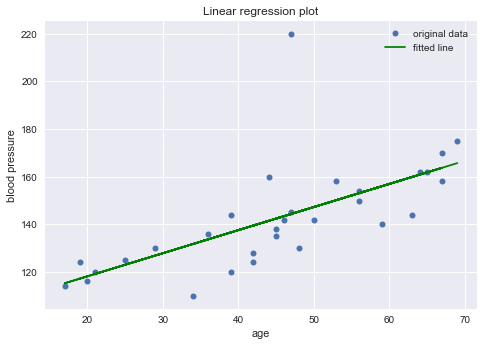

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('age')
ax.set_ylabel('blood pressure')
ax.set_title('Linear regression plot')
ax.plot(x, y, ".",label="original data",markersize=12)
ax.plot(x, intercept + slope*x, 'g', label='fitted line')
ax.legend()

# List the summary of least square

In [52]:
# Note the difference in argument order
input_data=df['Living area']
target_data=df['price']
X=sm.add_constant(input_data)#Add constant 1 to matrix,has θ0
Y=target_data
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     23.25
Date:                Sat, 04 Aug 2018   Prob (F-statistic):             0.0404
Time:                        12:16:09   Log-Likelihood:                -19.273
No. Observations:                   4   AIC:                             42.55
Df Residuals:                       2   BIC:                             41.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -42.7833     73.425     -0.583      0.619    -358.706     273.139
Living area     0.2296      0.048      4.822      0.040       0.025       0.434
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.346
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.740
Skew:                          -0.969   Prob(JB):                        0.691
Kurtosis:                       2.172   Cond. No.                     5.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
lm=linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("Intercept:",lm.intercept_)
print("Coefficients:",lm.coef_)
print("R-squared value:",lm.score(X,Y))

Intercept: [ 98.71471814]
Coefficients: [[ 0.          0.97087035]]
R-squared value: 0.432394731928


# Graph the result based on the summary

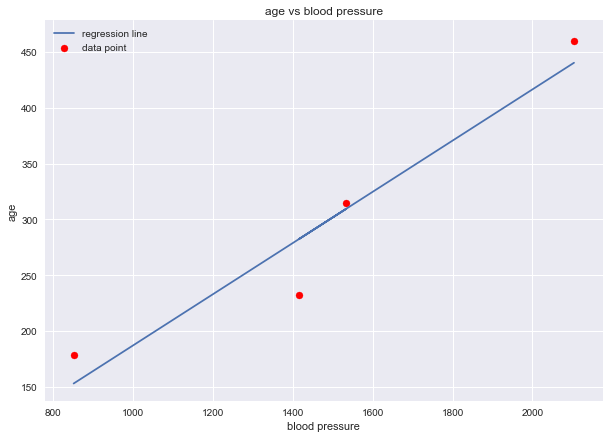

In [53]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(input_data,model.fittedvalues,label="regression line")
ax.scatter(input_data,target_data,label="data point",color="r")
ax.set_ylabel("age")
ax.set_xlabel("blood pressure")
ax.set_title("age vs blood pressure")
ax.legend(loc=2)